<a href="https://colab.research.google.com/github/sanchitmisra/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Probelm statement:-**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with
multiple choice and free text questions. Data is scraped in Spring 2019. The main objective
is to predict whether passengers will refer the airline to their friends.


**Feature descriptions briefly as follows**:

**airline**: Name of the airline.

**overall**: Overall point is given to the trip between 1 to 10.

**author**: Author of the trip

**reviewdate**: Date of the Review customer review: Review of the customers in free text format

**aircraft**: Type of the aircraft

**travellertype**: Type of traveler (e.g. business, leisure)

**cabin**: Cabin at the flight date flown: Flight date

**seatcomfort**: Rated between 1-5

**cabin service**: Rated between 1-5

**foodbev**: Rated between 1-5 entertainment: Rated between 1-5

**groundservice**: Rated between 1-5

**valueformoney**: Rated between 1-5

**recommended**: Binary, target variable.

#**Importing the libraries**:

In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import *

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')


#**Reading the Dataset**:

In [2]:
#Read the file
path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone_3(Classifier)/data_airline_reviews.xlsx'

df = pd.read_excel(path)

In [3]:
#Make a copy of our original dataset to protect it from any permanent changes.
airlines_df = df.copy()

In general it is safer to work on copies than on original data frames, except when you know that you won't be needing the original anymore and want to proceed with the manipulated version.

In [4]:
#Top 5 rows of the dataset
airlines_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Last 5 rows of the dataset
#pd.set_option("display.max_colwidth", None)
airlines_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
#Number of rows and columns
airlines_df.shape

(131895, 17)

As we can see our data have **131895 instances** and **17 features**.

In [7]:
#Column names of the dataset
airlines_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [8]:
#Checking the data of customer review column
airlines_df['customer_review']

0                                                       NaN
1         âœ… Trip Verified | London to Izmir via Istanb...
2                                                       NaN
3         âœ… Trip Verified | Istanbul to Bucharest. We ...
4                                                       NaN
                                ...                        
131890    Kiev - London (Gatwick) in business class (in ...
131891                                                  NaN
131892    Several flights - KBP to AMS (3 times one way)...
131893                                                  NaN
131894    KBP-AMS with UIA. Although it was a relatively...
Name: customer_review, Length: 131895, dtype: object

#**Data Inspection & Cleaning**:

In [9]:
#Check info of dataset
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64



*  By examining the info() method, we can see that there are **131895** rows in total and that the maximum number of non-NaN values is only 65947, indicating that every odd row is a NaN.

*   We next considered removing all odd rows from the dataset, however we realized later that the dataset's end still contained NaN rows.



**Checking for missing values**:

In [10]:
#Check the null value count for each column
airlines_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [11]:
#Define a function for Null-Values in percentage form.
def missing_values_per_check(df):
    percent_missing = airlines_df.isnull().sum() * 100 / len(airlines_df)
    missing_values_df = pd.DataFrame({'column_name': airlines_df.columns,
                                     'percent_missing': percent_missing})
    missing_values = missing_values_df.sort_values('percent_missing',ascending=False)
    idx = missing_values.reset_index(drop = 'index',inplace = True)
    return missing_values

In [12]:
#Null-values in percentage before removal.
missing_values_per_check(airlines_df)

,column_name,percent_missing
0,aircraft,85.050229
1,ground_service,70.159597
2,date_flown,69.951097
3,route,69.880587
4,traveller_type,69.858600
5,entertainment,66.493802
6,food_bev,60.113727
7,seat_comfort,53.992949
8,cabin_service,53.967171
9,cabin,52.005004


It is evident from the analysis above that our dataset has a significant number of null values.

In [13]:
# Remove the Null and duplicate values
airlines_df.dropna(how = 'all', inplace = True)
#airlines_df.drop_duplicates(inplace= True)
#Reset index of Dataframe.
airlines_df.reset_index(drop= 'index', inplace = True)

**Checking for duplicate values**:

In [14]:
#Check Duplicate Values
value=len(airlines_df[airlines_df.duplicated()])
print("\033[1mThe number of duplicate values in the data set is\033[0m : ",value)

The number of duplicate values in the data set is :  4764


However, these are not specifically duplicate values, but these are the ones that repeatedly appear in our dataset.

For Example: 'yes' or 'no' values in recommended column.

As a result, they will remain unchanged.

In [15]:
#Modify the date flown column
airlines_df['date_flown']= pd.to_datetime(airlines_df.date_flown)

In [16]:
#New columns month , day and  year added to dataset
for df in [airlines_df]:
    airlines_df['month'] = airlines_df['date_flown'].dt.month
    airlines_df['year'] = airlines_df['date_flown'].dt.year
    airlines_df['day'] = airlines_df['date_flown'].dt.day

In [17]:
#Drop original date flown column
airlines_df.drop('date_flown', axis=1 , inplace= True)

In [18]:
#Check info after cleaning the dataset
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   seat_comfort     60681 non-null  float64
 10  cabin_service    60715 non-null  float64
 11  food_bev         52608 non-null  float64
 12  entertainment    44193 non-null  float64
 13  ground_service   39358 non-null  float64
 14  value_for_money  63975 non-null  float64
 15  recommended      64440 non-null  object 
 16  month            39633 non-null  float64
 17  year        

* The above inspection shows us that we have **65947** valid rows in our dataset that sequenced from 0 to 65946.
* We have total 19 columns where **10** columns have **float** values and **9** have **categorical** values. 

In [19]:
#pd.set_option('display.max_rows', None)

In [20]:
#Checking the number of unique values in each columns.
uniq = dict(airlines_df.nunique())
uniq

{'airline': 81,
 'overall': 10,
 'author': 44069,
 'review_date': 3015,
 'customer_review': 61172,
 'aircraft': 2088,
 'traveller_type': 4,
 'cabin': 4,
 'route': 24549,
 'seat_comfort': 5,
 'cabin_service': 5,
 'food_bev': 5,
 'entertainment': 5,
 'ground_service': 5,
 'value_for_money': 5,
 'recommended': 2,
 'month': 12,
 'year': 7,
 'day': 1}

In [21]:
#Getting the number of unique values of some categorical variables with their counts.
for var in uniq :
  if (uniq[var]) <= 10:
    print(f'The column \033[1m\033[4m{var}\033[0m has unique values :\n{airlines_df[var].value_counts()}\n', '-'*50)

The column overall has unique values :
1.0     17383
10.0     8530
9.0      7850
8.0      7209
2.0      5988
7.0      4590
3.0      4041
5.0      3187
6.0      2635
4.0      2604
Name: overall, dtype: int64
 --------------------------------------------------
The column traveller_type has unique values :
Solo Leisure      14798
Couple Leisure    10285
Family Leisure     7583
Business           7089
Name: traveller_type, dtype: int64
 --------------------------------------------------
The column cabin has unique values :
Economy Class      48558
Business Class     10326
Premium Economy     2799
First Class         1620
Name: cabin, dtype: int64
 --------------------------------------------------
The column seat_comfort has unique values :
1.0    15222
4.0    14433
3.0    12139
5.0    10665
2.0     8222
Name: seat_comfort, dtype: int64
 --------------------------------------------------
The column cabin_service has unique values :
5.0    18426
1.0    14660
4.0    11428
3.0     8887
2.0   

As per above results we can observe:
* The number of unique values present in dataset and the target variable has balanced data.
* The day variable has only single value in it, therefore this column may be dropped.


##**Descriptive Statistics**:

In [22]:
#Get some statical information of numerical as well as categorical columns
airlines_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,65947,81,Spirit Airlines,2934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,64017.0,NaN,NaN,NaN,5.14543,3.477532,1.0,1.0,5.0,9.0,10.0
author,65947,44069,Anders Pedersen,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,65947,3015,19th January 2015,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,65947,61172,On March 2/14 a friend and I were booked on an...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,19718,2088,A320,2157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,39755,4,Solo Leisure,14798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,63303,4,Economy Class,48558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,39726,24549,Bangkok to Hong Kong,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seat_comfort,60681.0,NaN,NaN,NaN,2.95216,1.441362,1.0,1.0,3.0,4.0,5.0


# **EDA(Exploratory Data Analysis)**:

In [23]:
#Assign numerical features.
numerical_features = airlines_df.select_dtypes(include=['int64','float64'])
numerical_features.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'month', 'year', 'day'],
      dtype='object')

In [24]:
#Assign categorical features.
categorical_features = airlines_df.select_dtypes(include=['object'])
categorical_features.columns

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended'],
      dtype='object')

#**Univariate Analysis**:

##**Numerical features**:

In [25]:
#We define a function to implement Univariate Analysis.
def UVA_num(data,var_group):
  n = 1
  plt.figure(figsize=(20,80),dpi = 100)
  for j in var_group:
    ran = data[j].max()-data[j].min()
    maxi = list(dict(data[j].value_counts()).keys())[0]
    mini = list(dict(data[j].value_counts()).keys())[-1]
    plt.subplot(10,2,n)
    n=n+2
    sns.countplot(x=data[j])
    plt.xlabel('{}'.format(j), fontsize = 20)
    plt.title('Max = {};   Min = {}'.format(round(maxi,2),round(mini,2)))

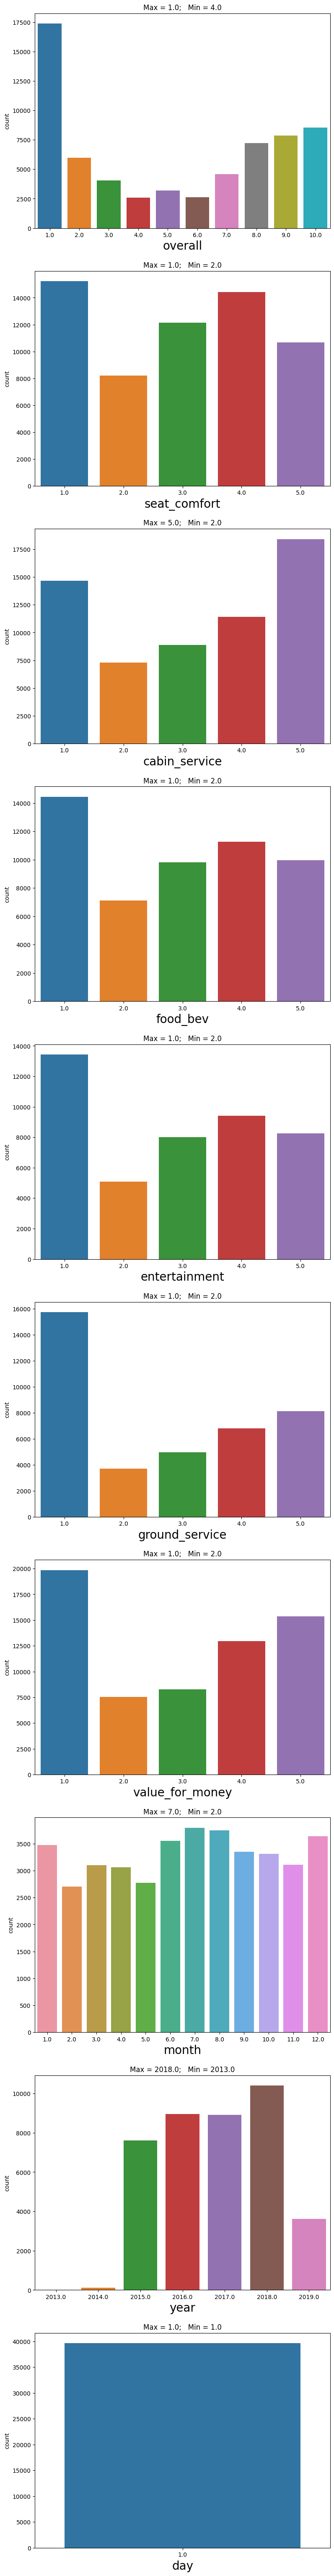

In [26]:
#Check distribution of all numerical features individually
UVA_num(airlines_df,numerical_features)

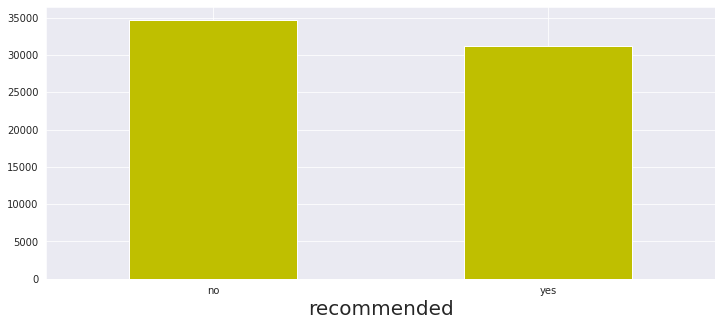

In [101]:
#Plotting bar graph to identify classes of dependent variable
plt.figure(figsize=(12,5))
airlines_df['recommended'].value_counts().plot(kind='bar', color ='y')
plt.xlabel('{}'.format('recommended'), fontsize = 20)
plt.xticks(rotation = 0);

By using univariate analysis, we found:
* The range for the overall rating is from 1 to 10. It has maximum counts belongs to 1 and minimum belongs to 4.
* The distributions of the columns for seat comfort, cabin service, food beverages, entertainment, ground service, and value for money all contain multiple peaks, making them all multimodal variables. These features have a different minimum and maximum counts values.
* The month feature's highest peak is 7 and minimum is 2. Later in our evaluation, we will analyse this feature again.
* With a max values in a year is 2018 and a minimum value count year is 2013, the year column spans from 2013 to 2019.
* With target variable we analysed, the count of 'no' is higher than count of 'yes'.

In [28]:
#We define a function to check the outliers in the dataset.
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

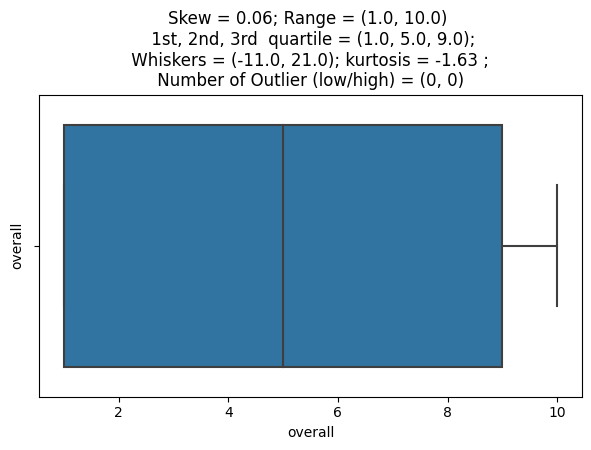

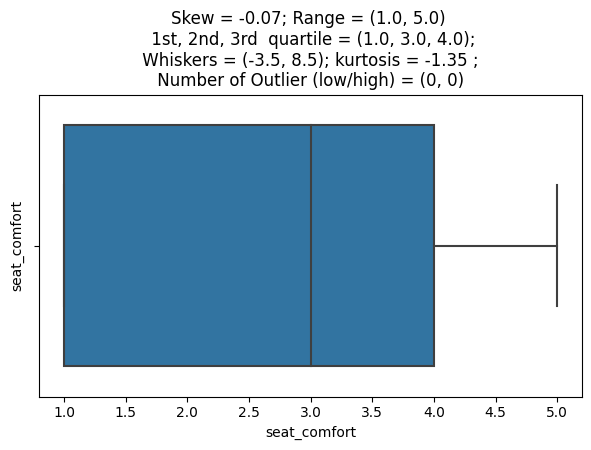

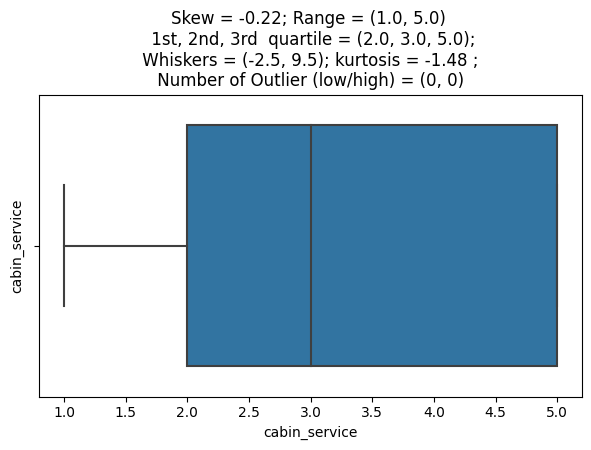

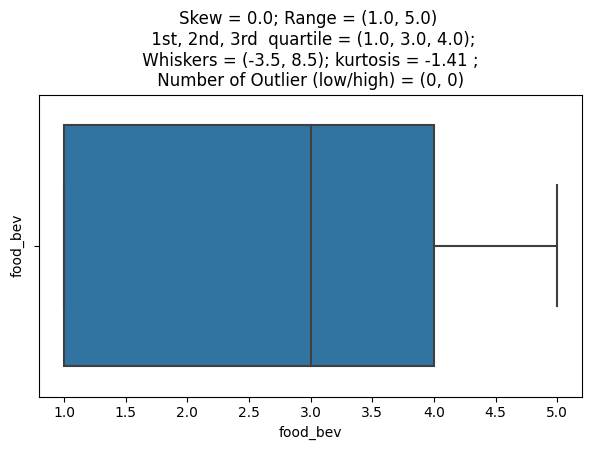

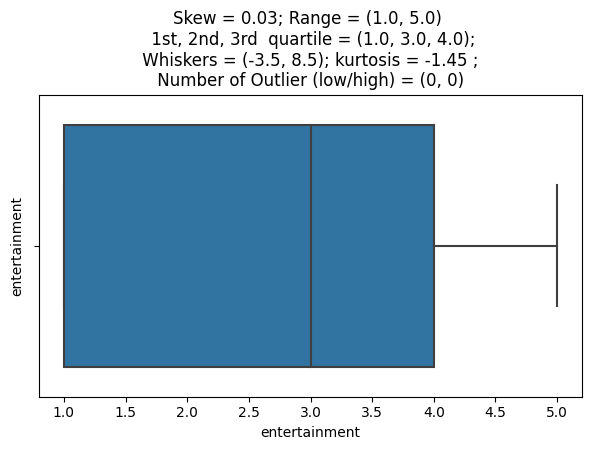

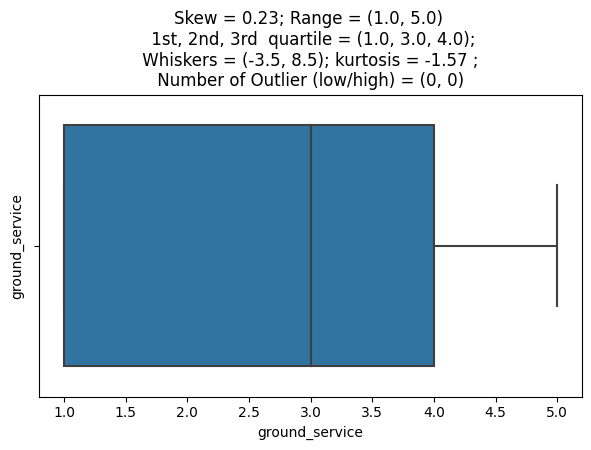

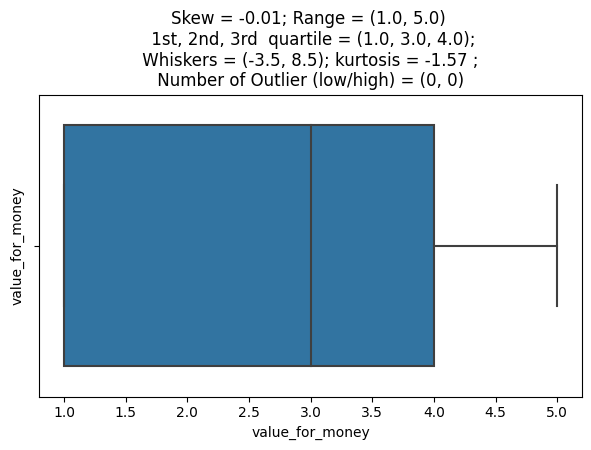

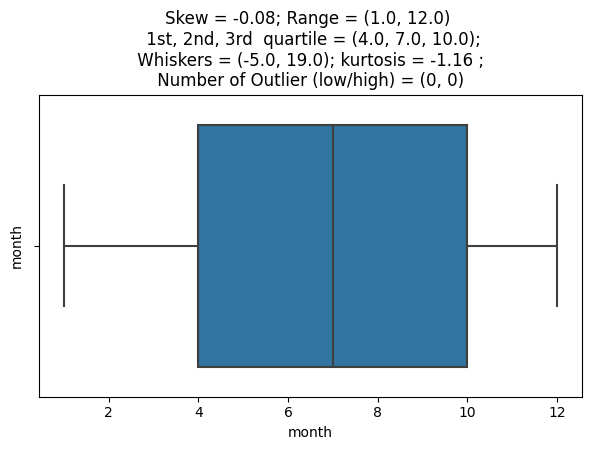

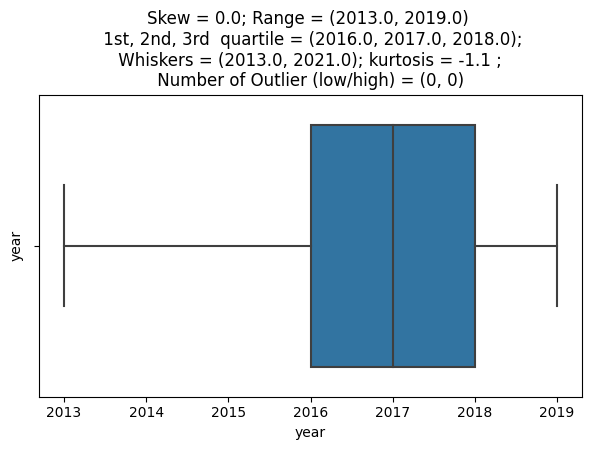

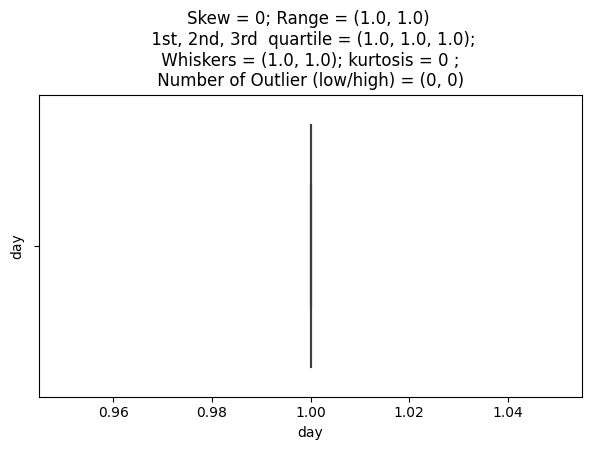

In [29]:
#Check the outliers with all numerical features individually.
for numb in numerical_features:
  UVA_boxplot(airlines_df,[numb])

* We can tell from the boxplot that our dataset does not contain any outliers.

##**Categorical features**:

##Top Airlines with maximum trips:

In [30]:
#Normalize the maximum number of trips on the basis of airline.
top_airlines= (airlines_df['airline'].value_counts(normalize = True)*100)[:10]
top_airlines_df = pd.DataFrame(top_airlines)
top_airlines_df

,airline
Spirit Airlines,4.449027
American Airlines,4.347431
United Airlines,4.289808
British Airways,4.262514
Cathay Pacific Airways,3.642319
Air Canada rouge,3.323881
Emirates,2.708235
China Southern Airlines,2.611188
Frontier Airlines,2.462584
Ryanair,2.374634


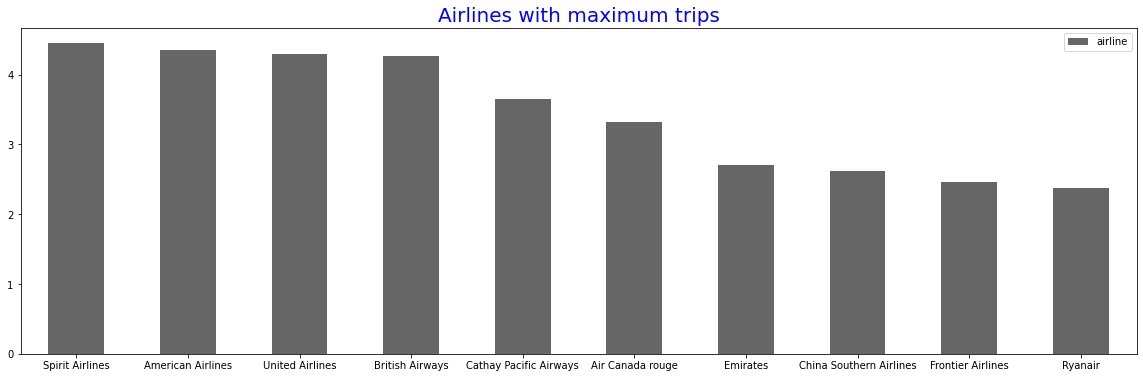

In [31]:
# Get the graphical representation of trips that each airline made.
top_airlines_df[:10].plot(kind='bar', colormap= 'Accent_r', figsize= (20,6) )
plt.title('Airlines with maximum trips', fontsize=20, color = 'blue')
plt.xticks(rotation= 0);

According to the above analysis, 
* The most frequent airline in the dataset, Spirit Airlines, maintains the top spot for the number of flights, followed by American and United airlines.

##Top Aircrafts with maximum trips:

In [32]:
#Normalize the maximum number of trips on the basis of aircrafts.
top_aircraft= (airlines_df['aircraft'].value_counts(normalize = True)*100)[:10]
top_aircraft_df = pd.DataFrame(top_aircraft)
top_aircraft_df

,aircraft
A320,10.939243
Boeing 777,6.161883
A380,5.624303
A330,5.446800
Boeing 737-800,5.254083
Boeing 787,4.736789
Boeing 777-300ER,4.265138
A319,3.494269
A321,3.468912
Boeing 737,3.347195


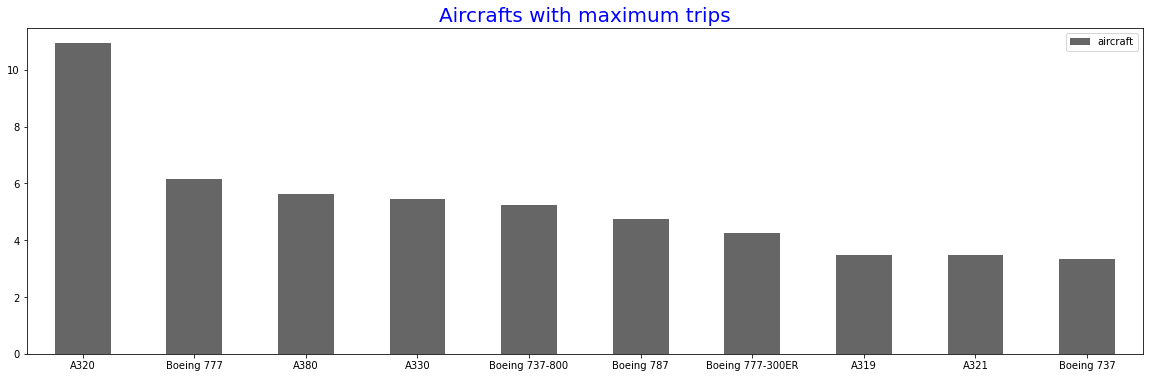

In [33]:
# Get the number of trips each airline make.
top_aircraft_df[:10].plot(kind='bar', colormap= 'Accent_r', figsize= (20,6) )
plt.title('Aircrafts with maximum trips', fontsize=20, color = 'blue')
plt.xticks(rotation= 0);

* The most frequent Aircraft in the dataset, Airbus A320, maintains the top spot for the number of flights, followed by Boeing 777  and Airbus A380 aircraft.

##Top routes travelled across the world:

In [34]:
#Normalize the maximum number of trips on the basis of routes.
top_route= (airlines_df['route'].value_counts(normalize = True)*100)[:10]
top_route_df = pd.DataFrame(top_route)
top_route_df

,route
Bangkok to Hong Kong,0.088104
BKK to LHR,0.080552
LHR to JFK,0.075517
Vancouver to Toronto,0.075517
Hong Kong to Bangkok,0.070483
Singapore to Bangkok,0.070483
LHR to BKK,0.067966
HKG to LHR,0.065448
Guangzhou to New York,0.065448
Hong Kong to London,0.062931


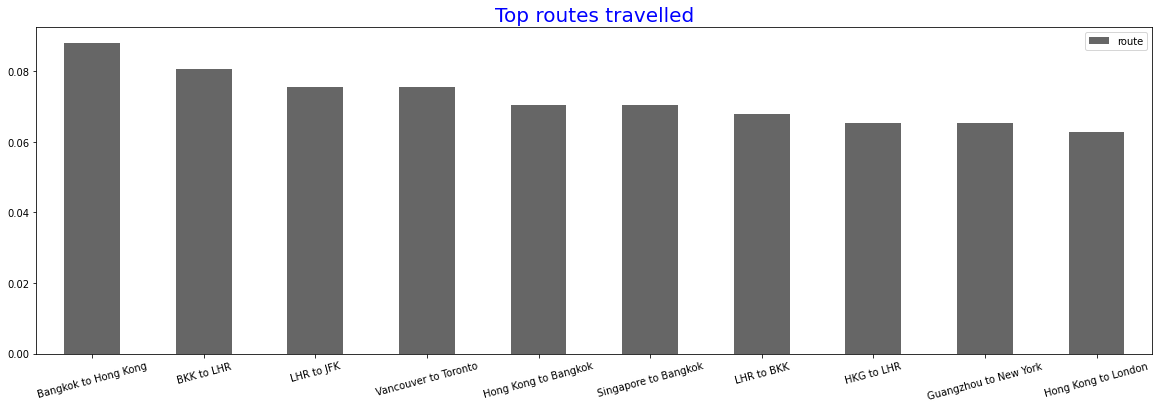

In [35]:
# Get the number of trips each airline make.
top_route_df[:10].plot(kind='bar', colormap= 'Accent_r', figsize= (20,6) )
plt.title('Top routes travelled', fontsize=20, color = 'blue')
plt.xticks(rotation= 15);

* According to the above analysis, Bangkok to Hong Kong journey with maximum frequency in dataset holds the tops position followed by Bangkok to London and London to New York.

##Month with the maximum number of trips travelled:

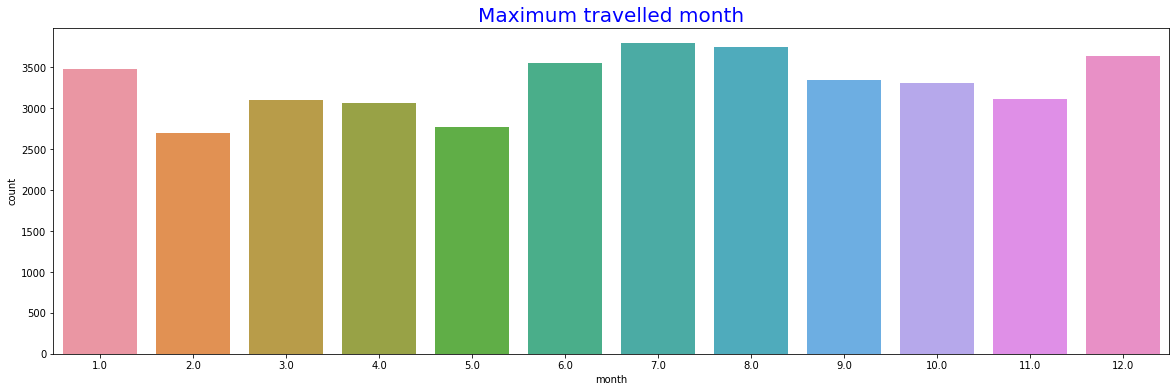

In [36]:
# Get countplot of 'month' feature
plt.figure(figsize=(20,6))
plt.title('Maximum travelled month', fontsize=20, color = 'blue')
sns.countplot(airlines_df['month']);

* The month of July is said to be the one with the highest travel. The second-most popular month for travel is December.

In [37]:
#Analyzing some of the remaining categorical features.
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

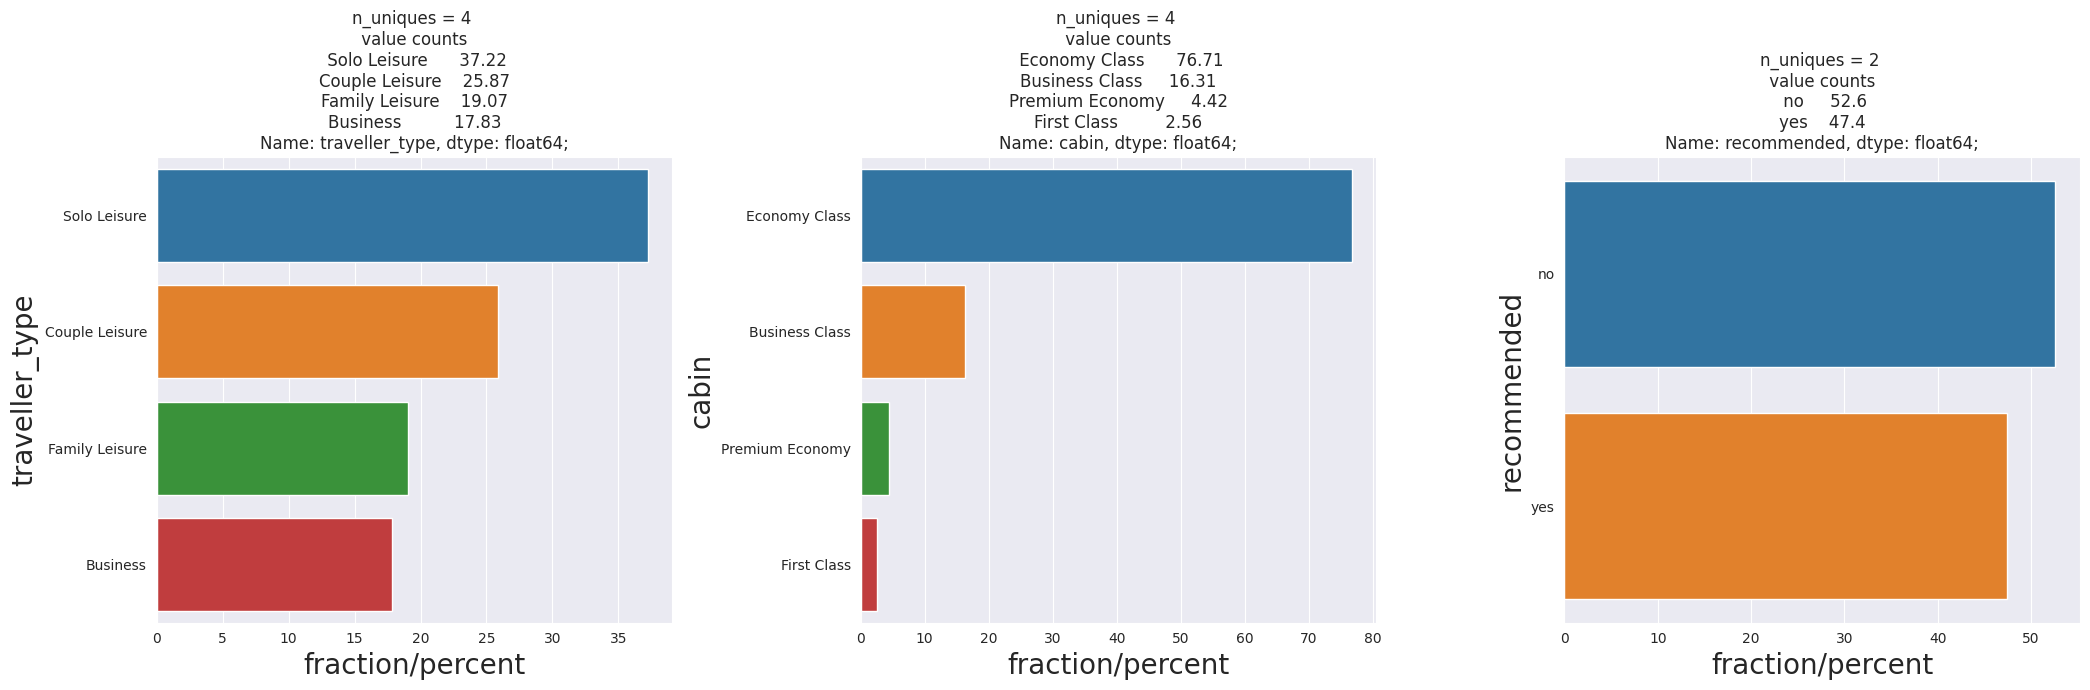

In [38]:
#traveller_type, cabin and recommended to be analyzed seperately for better visualization.
UVA_category(airlines_df,['traveller_type', 'cabin', 'recommended'])

* The three plots mentioned above made it easier for us to understand that the majority of travellers are Solo Leisure in travellers type column.
* For most passengers, the Economy class is the one they like in the cabin column.
* There is slight variation between recommended and not recommended in the recommended column.

#**Bivariate Analysis**:

In [39]:
#We define a function to implement Bivariate Analysis.
from scipy.stats import chi2_contingency
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False
  n = 1
  plt.figure(figsize=(25,25))
  plt.subplot(4,2,n)
  n=n+1
  sns.countplot(x=cat, hue=tar, data=data)
  #plt.data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))
  plt.xticks(rotation=90)
  #annotate_horizontal(splot)
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

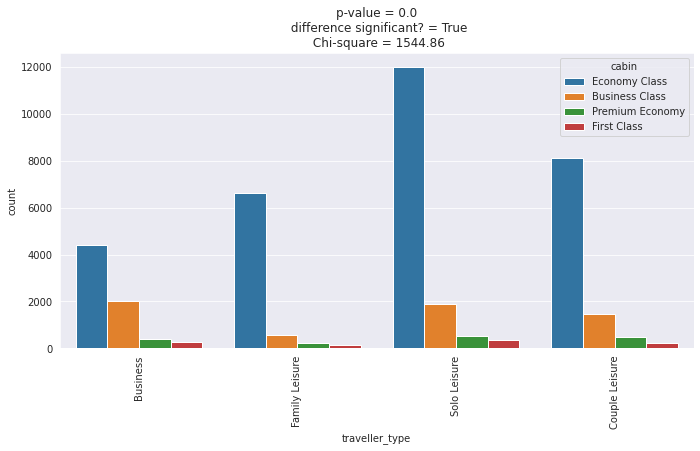

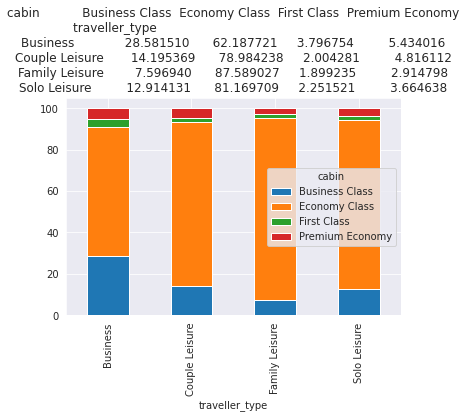

In [40]:
#Executing the bivariate analysis on traveller_type with cabin. 
BVA_categorical_plot(airlines_df,'cabin','traveller_type')

By using bivariate analysis we observed:
* All types of travellers strongly prefer the economy class.
* Some of the Business class and Couple Leisure people choose business class for travelling. 
* First class is least preferred among all traveller type categories.

#**Multivariate Analysis**:

In [41]:
#Ploting Pivot table for the Traveller_type and their preferred cabin to be Recommended or Not Recommended.
pd.pivot_table(airlines_df, index=['traveller_type', 'cabin'], columns='recommended', values='overall',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

recommended                        no    yes  TOTAL
traveller_type cabin                               
Business       Business Class     903   1122   2025
               Economy Class     2966   1440   4406
               First Class        136    133    269
               Premium Economy    210    175    385
Couple Leisure Business Class     540    919   1459
               Economy Class     5484   2634   8118
               First Class         99    107    206
               Premium Economy    260    235    495
Family Leisure Business Class     174    402    576
               Economy Class     4263   2378   6641
               First Class         65     79    144
               Premium Economy    139     82    221
Solo Leisure   Business Class     458   1452   1910
               Economy Class     6714   5290  12003
               First Class         77    256    333
               Premium Economy    215    327    542
TOTAL                           22703  17030  39733

#Highest overall ratings on the basis of airlines:

In [42]:
#Compare the airline, number of customer_review and overall rating features for a detailed analysis
airlines_df.groupby('airline').agg({'customer_review':'count','overall':'sum'}).rename(columns={'customer_review': 'customer_review_count', 'overall': 'overall_score'}).sort_values(by= 'overall_score',ascending=False).reset_index()

,airline,customer_review_count,overall_score
0,Cathay Pacific Airways,2402,16546.0
1,British Airways,2811,13867.0
2,China Southern Airlines,1722,13294.0
3,Qatar Airways,1445,10808.0
4,Emirates,1786,10288.0
...,...,...,...
76,flydubai,201,726.0
77,Adria Airways,85,421.0
78,Tunisair,71,289.0
79,Thai Smile Airways,48,282.0


* From above analysis, Cathay Pacific Airways of Hong Kong is the most liked airlines on the basis of their overall ratings.

#Highest overall ratings on the basis of aircrafts:

In [43]:
#Compare the airline, aircraft and overall rating features for a detailed analysis
airlines_df.groupby(['airline','aircraft']).agg({'overall':'sum'}).rename(columns={'overall': 'overall_score'}).sort_values(by= 'overall_score',ascending=False).reset_index()

,airline,aircraft,overall_score
0,Emirates,A380,2330.0
1,China Southern Airlines,A330,1781.0
2,Ryanair,Boeing 737-800,1553.0
3,Cathay Pacific Airways,Boeing 777-300ER,1228.0
4,British Airways,A320,1222.0
...,...,...,...
4002,Delta Air Lines,Boeing 747,1.0
4003,Qantas Airways,Boeing 737 and A380,1.0
4004,Alaska Airlines,1029,1.0
4005,Ukraine International,Boeing 767-300,1.0


* As a result of statistics showing, we were able to draw some interesting conclusions that Emirates Airlines' Airbus A380 is the most popular aircraft, However, based on the ratings given to all airlines, Emirates Airlines is not the most popular airline.

#Airlines recent 5 year trend:

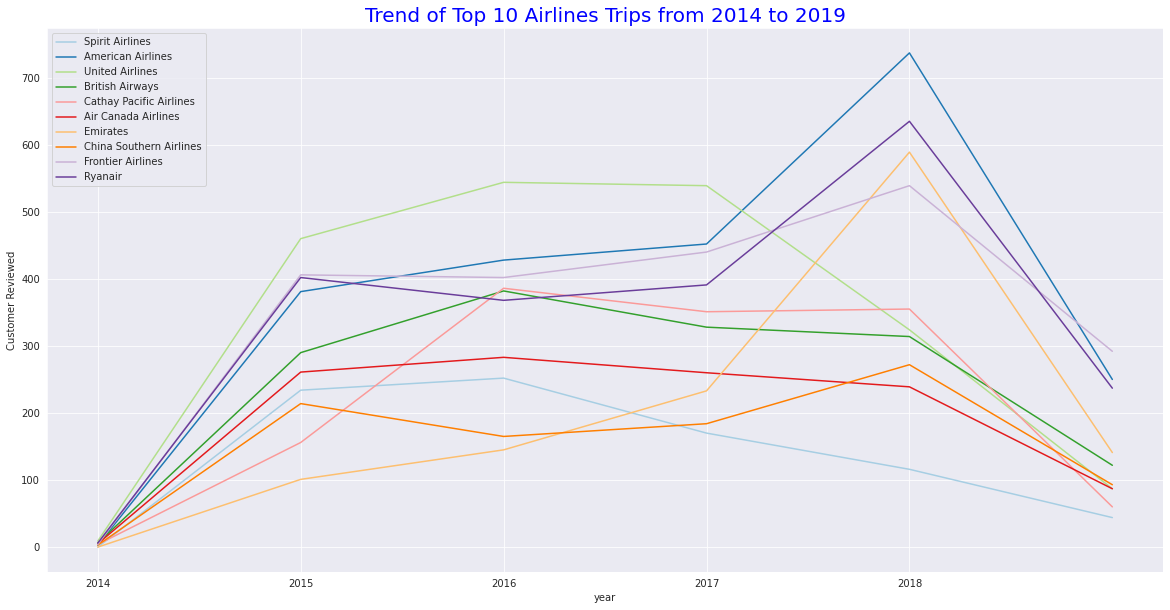

In [44]:
#Determining the last 5 year trend of airlines.
groups_10 = airlines_df[airlines_df.airline.isin(airlines_df.airline.value_counts()[:10].index)]
pd.crosstab(groups_10.year, groups_10.airline).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(range(2014, 2019, 1))
plt.ylabel('Customer Reviewed')
plt.title('Trend of Top 10 Airlines Trips from 2014 to 2019', fontsize=20, color = 'blue')
plt.legend(labels=['Spirit Airlines',
                   'American Airlines',
                   'United Airlines',
                   'British Airways',
                   'Cathay Pacific Airlines',
                   'Air Canada Airlines',
                   'Emirates',
                   'China Southern Airlines',
                   'Frontier Airlines',
                   'Ryanair'], loc='upper left')
plt.show()

The above graph shows the number of customers reviewed airlines in last 5 years:
* In its initial days American airlines was at low, but in 2018 it reaches to its all time peak and become top preferred airlines for their operations.
* United airlines of USA retained their top position from 2014 to 2017, then its number of reviews degraded further.
* Emirates airlines was least preffered in its initial days, but it increased its customer base in 2018 and retained their place in top 3 airlines.
* We have also analyzed above that spirit airlines is least preferred by travellers, However we can also see that in the above trend graph.

#Examine the customer review column:

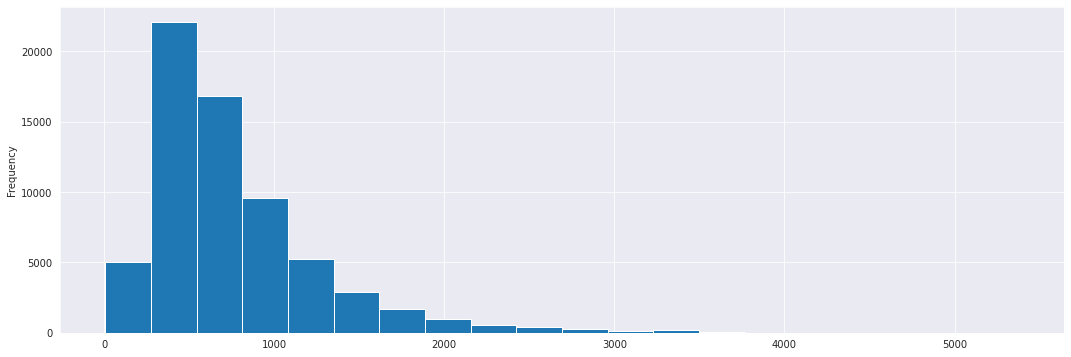

In [45]:
#Add new column 'length'
airlines_df['length'] = airlines_df['customer_review'].apply(len)
#Check distribution of length column of each customer's review
airlines_df['length'].plot(kind = 'hist', bins = 20, figsize = (18,6));

* Hence, above graph is right skewed which tells us that the length of customer reviews is mostly between 1 to 1000 words.

#**Multicollinearity**:

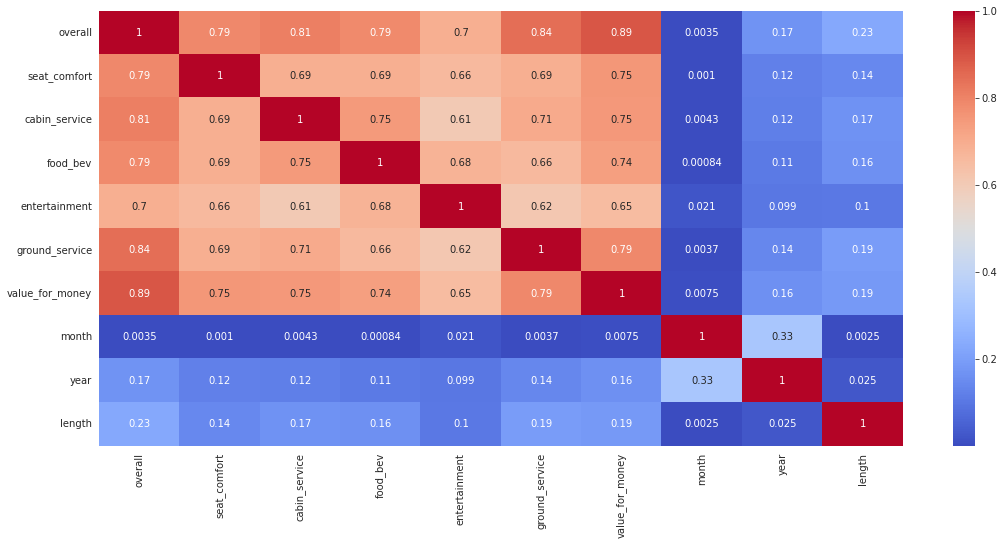

In [46]:
#Check multicollinearity among all independent variables
plt.figure(figsize=(18,8))
correlation =abs( airlines_df.drop('day',axis=1).corr())
sns.heatmap(correlation, annot=True, cmap='coolwarm');

In above heatmap:
* We can observe that a lot of rating variables have strongly correlated with the overall rating column. Therefore, we may ignore the remaining correlated columns and focus just on the overall column in order to optimize our analysis.

#**Data Pre-processing**:

##**In order to perform sentiment analysis with our NLP model, we will only focus on three columns that are recommended, overall and customer reviews in our analysis ahead.**

##Preparing data for NLP models:

In [47]:
#Check null values of target variable where overall ratings given
(airlines_df['recommended'].isnull() & airlines_df['overall'].notna()).sum()

1487

Therefore, 1487 rows are those, where overall ratings have some values but in same rows recommended column have null values. So we will try to fill recommended column null values with the help of overall column.

In [48]:
#Create new dataframe where recommended column have null values but overall ratings were given
df2 = airlines_df[airlines_df['recommended'].isnull()]
df2.head(3)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,month,year,day,length
32,Turkish Airlines,1.0,Deepa Acharya,6th April 2019,âœ… Trip Verified | Lagos to Istanbul via Kath...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629
76,Turkish Airlines,1.0,B Marten,7th February 2019,âœ… Trip Verified | Seychelles to Birmingham v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469
104,Turkish Airlines,8.0,David Jackson,8th January 2019,âœ… Trip Verified | London to Bangkok via Ista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213


In [49]:
#Fill recommended column null values based on overall ratings given
df2.loc[df2["overall"] <= 5.0, "recommended"] = 'no'
df2.loc[df2["overall"] > 5.0, "recommended"] = 'yes'

In [50]:
df2.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,month,year,day,length
32,Turkish Airlines,1.0,Deepa Acharya,6th April 2019,âœ… Trip Verified | Lagos to Istanbul via Kath...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,629
76,Turkish Airlines,1.0,B Marten,7th February 2019,âœ… Trip Verified | Seychelles to Birmingham v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,469
104,Turkish Airlines,8.0,David Jackson,8th January 2019,âœ… Trip Verified | London to Bangkok via Ista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,213
105,Turkish Airlines,1.0,Gordon Turpin,8th January 2019,âœ… Trip Verified | At check-in in Johannesbur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,803
130,Turkish Airlines,1.0,Omid Ziaee,28th November 2018,âœ… Trip Verified | San Francisco to Mashhad v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,527


In [51]:
#Concate df2 and original dataframe together
frames = [airlines_df,df2]
airlines_df = pd.concat(frames,)

In [52]:
#Check info before removal of remaining null values
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67454 entries, 0 to 65895
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          67454 non-null  object 
 1   overall          65504 non-null  float64
 2   author           67454 non-null  object 
 3   review_date      67454 non-null  object 
 4   customer_review  67454 non-null  object 
 5   aircraft         19719 non-null  object 
 6   traveller_type   39756 non-null  object 
 7   cabin            63304 non-null  object 
 8   route            39727 non-null  object 
 9   seat_comfort     60681 non-null  float64
 10  cabin_service    60715 non-null  float64
 11  food_bev         52608 non-null  float64
 12  entertainment    44193 non-null  float64
 13  ground_service   39358 non-null  float64
 14  value_for_money  63975 non-null  float64
 15  recommended      65927 non-null  object 
 16  month            39633 non-null  float64
 17  year        

In [53]:
# Remove the Null and duplicate values
airlines_df.dropna(how = 'all',subset = ['recommended'],inplace = True)
#Reset index of Dataframe.
airlines_df.reset_index(drop= 'index', inplace = True)

In [54]:
#Check info after removal of remaining null values
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65927 entries, 0 to 65926
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65927 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65927 non-null  object 
 3   review_date      65927 non-null  object 
 4   customer_review  65927 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   seat_comfort     60681 non-null  float64
 10  cabin_service    60715 non-null  float64
 11  food_bev         52608 non-null  float64
 12  entertainment    44193 non-null  float64
 13  ground_service   39358 non-null  float64
 14  value_for_money  63975 non-null  float64
 15  recommended      65927 non-null  object 
 16  month            39633 non-null  float64
 17  year        

In [55]:
#Duplicate values in target variable
len(airlines_df.loc[airlines_df['recommended'] != airlines_df['recommended'] ])

0

#**Natural Language Processing**:

In [56]:
#Create new dataframe for building NLP model
cust_df = airlines_df[['customer_review','recommended']]

In [57]:
#Check info of remaining columns
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65927 entries, 0 to 65926
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_review  65927 non-null  object
 1   recommended      65927 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


##**Import neccessary libraries for NLP**:

In [58]:
# import re for regularExpression
# importing natural language toolkit
import re
import nltk
import string
# import pos_tag for removal of parts of speech
from nltk import pos_tag
# importing stopwords from nitk corpus
from nltk.corpus import stopwords
from nltk.corpus import wordnet
# download important nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [59]:
# import wordnet lemmatizer to remove insignificant words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

##**Text Cleaning**:

In [60]:
# Returning the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
#Define function for cleaning the text
def text_cleaning(data):

  # Remove single characters from the start
  processed_feature = re.sub('[^a-zA-Z]', ' ', data) 

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()

  processed_feature = processed_feature.split(' ')
  
   # removing stopword
  stop_words=set(stopwords.words('english'))
  stop_words.remove('not')
  processed_feature = [i for i in processed_feature if i not in stop_words]

  # pos tag text
  pos_tags = pos_tag(processed_feature)

  # using lemmatization on words
  processed_feature = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
  # remove words with only two letter
  processed_feature = [t for t in processed_feature if len(t) > 2]

   # join all
  processed_feature = ' '.join(processed_feature)
  return processed_feature

**Text cleaning** is the process of preparing raw text for NLP (Natural Language Processing) so that machines can understand human language.
Following approach is used here to clean the text of customer reviews:
* **Use pos_tag with nltk**:- POS Tagging in NLTK is a process to mark up the words in text format for a particular part of a speech based on its definition and context. 
* Remove all character which are excluded from "**a-z and A-Z**".
* Convert words into **Lowercase** and **split** them through space.
* Remove **stopwords** using **nltk** library.
* Lemmatization of reviews and get the meaningful words using **WordNetLemmatizer**.
* **Join** back the words that were split before.
* Initiate **tokenization** process.

In [61]:
# creating token of words with the help of text cleaning function
cust_df['tokenized_review'] = cust_df['customer_review'].apply(text_cleaning)

In [62]:
# Length of review before Text Cleaning 
len(cust_df['customer_review'][0])

1143

In [63]:
# Length of review after Text Cleaning 
len(cust_df['tokenized_review'][0])

740

In [64]:
# Comapre customer review and new tokenized review column
cust_df

,customer_review,recommended,tokenized_review
0,âœ… Trip Verified | London to Izmir via Istanb...,yes,trip verify london izmir via istanbul first ti...
1,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,trip verify istanbul bucharest make check airp...
2,âœ… Trip Verified | Rome to Prishtina via Ista...,no,trip verify rome prishtina via istanbul fly co...
3,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,trip verify flew turkish airline iad ist khi r...
4,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,trip verify mumbai dublin via istanbul never b...
...,...,...,...
65922,âœ… Trip Verified | Kiev to Riga. 24 hrs befor...,no,trip verify kiev riga flight get notification ...
65923,âœ… Verified Review | Flew Ukraine Internation...,no,verify review fly ukraine international kiev a...
65924,We travelled Ukraine International from London...,no,travelled ukraine international london gatwick...
65925,DXB-KBP-LGW. Both planes were 737-800s but the...,yes,dxb kbp lgw plane seat not identical dubai kie...


* We can see that, text of customer reviews has improved exceptionally.

In [65]:
#Define a function to check top frequent words
from collections import Counter

Word_count = Counter()
for text in cust_df['tokenized_review']:
  for word in text.split(' '):
    Word_count[word] +=1
Word_count.most_common(10)

top_10_word_count= Word_count.most_common(10)
top_10_word_count = dict(top_10_word_count)

In [66]:
# Estimate the top 10 most frequent words
top_10_word_count= pd.DataFrame({'Words': top_10_word_count.keys(), 'Counts': top_10_word_count.values()})
top_10_word_count

,Words,Counts
0,flight,149817
1,not,71986
2,seat,62693
3,airline,46015
4,time,45169
5,service,43398
6,hour,37602
7,get,37601
8,fly,36750
9,good,32761


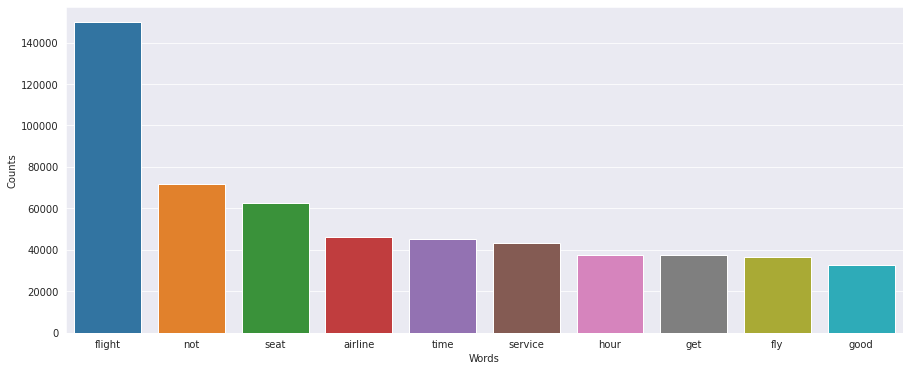

In [67]:
# Plot the top 10 most frequent words
plt.figure(figsize = (15,6))
sns.barplot(x= 'Words',y = 'Counts', data=top_10_word_count);

* Hence, above analysis tells us that 'flight' word is highly repeated in documents followed by some of other top words.

In [68]:
'''# Estimate the most infrequent words
rare_words = Word_count.most_common()[-30490:]

print(rare_words)

Rare_words = set(word for (word, wc) in rare_words)
def Remove_rare_words(text):
  return " ".join([word for word in text.split() if word not in Rare_words])'''

'# Estimate the most infrequent words\nrare_words = Word_count.most_common()[-30490:]\n\nprint(rare_words)\n\nRare_words = set(word for (word, wc) in rare_words)\ndef Remove_rare_words(text):\n  return " ".join([word for word in text.split() if word not in Rare_words])'

* Some rare words are printed above that are least present in our documents.

#**Model Building**:

In [69]:
#Text Vecorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)

* Text vectorizer is used to convert text into weighted tokens, so that ML model can easily get trained on the given data. 
* Due to the computational complexity we used maximum features parameter as 5700.

In [70]:
#Convert text into binary numbers.
cust_df['recommended'] = cust_df['recommended'].replace({'yes': 1, 'no': 0})

In [71]:
#Assign independent and dependent Features
X = tfidf.fit_transform(cust_df['tokenized_review']).toarray()
y = cust_df['recommended'].values

In [72]:
# Check new shape of data
print(X.shape)
print(y.shape)

(65927, 4000)
(65927,)


We can see that,the TF-IDF vectorizer converted text sentences of customer review column into 5700 new features.

In [73]:
#Import train-test split to partition data into train and test dataset
from sklearn.model_selection import train_test_split

In [74]:
# Perform train-test split to the independent and dependent variables
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [75]:
#Imports Liberaries of classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import time
# Importing  metrics for evaluation of our model performance
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [76]:
#Declare the models
lr_model=LogisticRegression()
pac_model=PassiveAggressiveClassifier()
gb_model = GradientBoostingClassifier(n_estimators = 50,max_depth = 6,min_samples_split = 10,min_samples_leaf = 30)
rf_model=RandomForestClassifier()
gnb_model = GaussianNB()


#Create a list of models
models=[lr_model,pac_model,gb_model,gnb_model,rf_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}                            #Create emplty dictionaries & list
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)           #fit the model on train data
        end= time.time()
        y_pred=model.predict(X_test)         #predict the test data
        y_pred_train=model.predict(X_train)
        
        #Compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)                 #Check evaluation metrics
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)

        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)           #Consolidate the scores into dataframe
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'Model_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [77]:
# Get performance matrix dataframe for different classifiers.
final_result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

In [78]:
#  Get performance on different models
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,Model_training_time
0,LogisticRegression,92.29,91.21,92.44,91.06,91.28,89.89,92.25,91.12,0.911223,23.805163
1,PassiveAggressiveClassifier,93.04,89.41,94.43,90.47,90.73,86.26,92.94,89.20,0.891959,13.687077
2,GradientBoostingClassifier,88.41,87.18,89.12,87.07,86.18,85.00,88.31,87.03,0.870310,1097.862227
3,GaussianNB,83.83,82.41,81.40,79.44,85.59,83.80,83.91,82.50,0.824983,3.937191
4,RandomForestClassifier,100.00,89.41,99.99,88.60,100.00,88.60,100.00,89.36,0.893587,130.841879


In [79]:
#  Get confusion matrix on different train models
for model,matrix in dct_train.items():
  print('The test confusion matrix of \033[1m{}\033[0m is :'.format(model),'\n',matrix,'\n','-'*50)


The test confusion matrix of LogisticRegression is : 
 [[25753  1874]
 [ 2191 22923]] 
 --------------------------------------------------
The test confusion matrix of PassiveAggressiveClassifier is : 
 [[26284  1343]
 [ 2327 22787]] 
 --------------------------------------------------
The test confusion matrix of GradientBoostingClassifier is : 
 [[24984  2643]
 [ 3471 21643]] 
 --------------------------------------------------
The test confusion matrix of GaussianNB is : 
 [[22716  4911]
 [ 3618 21496]] 
 --------------------------------------------------
The test confusion matrix of RandomForestClassifier is : 
 [[27625     2]
 [    0 25114]] 
 --------------------------------------------------


In [80]:
#  Get confusion matrix on different test models
for model,matrix in dct_test.items():
  print('The test confusion matrix of \033[1m{}\033[0m is :'.format(model),'\n',matrix,'\n','-'*50)

The test confusion matrix of LogisticRegression is : 
 [[6524  540]
 [ 619 5503]] 
 --------------------------------------------------
The test confusion matrix of PassiveAggressiveClassifier is : 
 [[6508  556]
 [ 841 5281]] 
 --------------------------------------------------
The test confusion matrix of GradientBoostingClassifier is : 
 [[6291  773]
 [ 918 5204]] 
 --------------------------------------------------
The test confusion matrix of GaussianNB is : 
 [[5736 1328]
 [ 992 5130]] 
 --------------------------------------------------
The test confusion matrix of RandomForestClassifier is : 
 [[6366  698]
 [ 698 5424]] 
 --------------------------------------------------


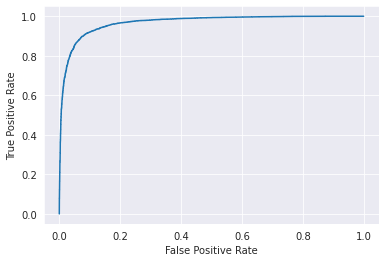

In [81]:
#Predict the probability based on logistic regression
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr,tpr, _ = roc_curve(y_test, y_pred_proba)
#Plot Auc-ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##**Hyperparameter tuning**:




In [82]:
# Import gridsearchcv for cross validation
from sklearn.model_selection import GridSearchCV

In [83]:
# Assign the range of parameters
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5) 
# Fit training data to hypertune the model
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


In [84]:
# Get the best estimators
rf_optimal_model = CV_rfc.best_estimator_

In [85]:
# Predict the train and test data
train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [86]:
# Calculate, accuracy and auc on train data
rf_train_accuracy = accuracy_score(y_train,train_class_preds)
rf_train_auc = roc_auc_score(y_train,train_class_preds)

# Calculate, accuracy and auc on test data
rf_test_accuracy = accuracy_score(y_test,test_class_preds)
rf_test_auc = roc_auc_score(y_test,test_class_preds)

# Print the results for train
print("Performance on train data ")
print("Accuracy : " ,rf_train_accuracy*100)
print("AUC ROC Score : ", rf_train_auc*100)
print("\n")

# Print the results for test
print("Performance on test data ")
print("Accuracy : " ,rf_test_accuracy*100)
print("AUC ROC Score : ", rf_test_auc*100)

Performance on train data 
Accuracy :  99.99620788380956
AUC ROC Score :  99.99638035255366


Performance on test data 
Accuracy :  99.98483239799788
AUC ROC Score :  99.98584371460927


In [87]:
#Check f1 score for the test data
y_pred=rf_optimal_model.predict(X_test)
f1_score=f1_score(y_test,y_pred)
print(round(f1_score*100,2))

99.98


* After running the hypertuned model, we obtain a reasonable F1 score of 99.98

##**Let us check our model performance on some data that is randomly created**:

In [88]:
#Import pipeline to reduce complexity of our code
from sklearn.pipeline import Pipeline

In [89]:
#Convert binary numbers into text
cust_df['recommended'] = cust_df['recommended'].replace({1: 'yes', 0: 'no'})

In [90]:
## defining Independent variable
X = cust_df.tokenized_review

## defining dependent variable
y = cust_df.recommended

In [91]:
#Split data into test-train without changing the text format
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [92]:
#Implement pipeline with vectorizer and selected model
model = Pipeline([('vectorizer',tfidf),('classifier',gb_model)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=6, min_samples_leaf=30,
                                            min_samples_split=10,
                                            n_estimators=50))])

In [93]:
#Create random list of reviews and predict the dependent variable
reviews = ['it was an average flight but facilites can be better ','I had a great experience','hospitality are good',
         'seats were  comfortable', 'he is not satisfied',
        'he is angry with staff behaviour', 'There was clean food available', 'The flight was cancelled twice, flew with another airline','bigger boarding wa time orderly seat seemed new private opinion','Experience was not good']
result = model.predict(reviews)

df1 = pd.DataFrame({'Reviews': reviews, 'Recommended': result })
df1

,Reviews,Recommended
0,it was an average flight but facilites can be ...,no
1,I had a great experience,yes
2,hospitality are good,yes
3,seats were comfortable,yes
4,he is not satisfied,no
5,he is angry with staff behaviour,no
6,There was clean food available,yes
7,"The flight was cancelled twice, flew with anot...",no
8,bigger boarding wa time orderly seat seemed ne...,yes
9,Experience was not good,yes


#**Finally, check feature Importance of original dataset**:

In [94]:
# Install Shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
# Import shap and XG Boosting library
from xgboost import XGBClassifier
import shap

In [96]:
# Assign the dependent and independent numerical features last time
X_shap=airlines_df[airlines_df.describe().columns]
y_shap = cust_df['recommended']

In [97]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_shap, y_shap, test_size = 0.25, random_state = 0)

In [98]:
# Fit the training data
xgb_model = XGBClassifier()
fit_model = xgb_model.fit(X_train,y_train)

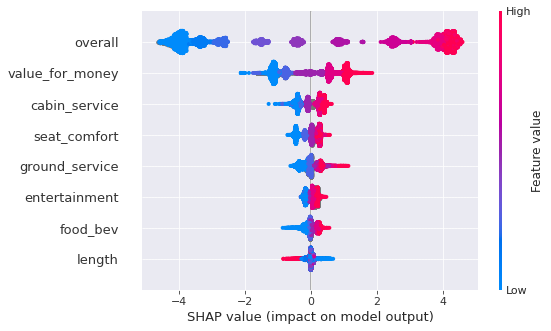

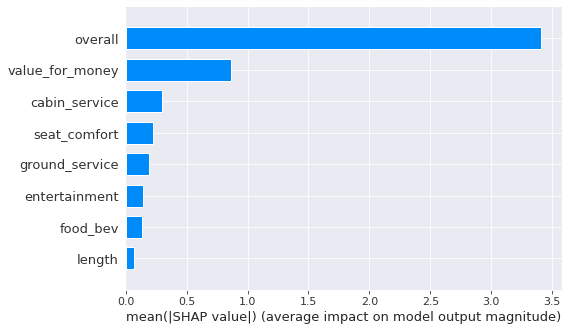

In [99]:
# Get the Shap summary of important features on test data to analyze how each feature contribute in the airline passenger referral prediction process.
explainer = shap.TreeExplainer(fit_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,max_display= 8)
shap.summary_plot(shap_values, X_test, max_display= 8, plot_type="bar")

With the help of shap summary,

* We find out the top 5 features:

1. overall
2. value_for_money
3. cabin_service
4. seat_comfort
5. ground_service

* We can also state that-

1. 'Overall' rating feature contribute most to the model's prediction.
2. 'Food_Beverage' rating feature contribute the lowest to the model's prediction.


#**Conclusion**:
* The highest peak of the month feature is 7. During our analysis we find, July is the month with most travels. December is the second-most popular month.
*	Most trips are taken by Spirit Airlines, which has the highest frequency in the dataset.
*	The most trips taken were made by Airbus A320 aircraft, which had the highest frequency in the dataset, followed by Boeing 777 and Airbus A380 aircraft.
*	Top spot pertains to the Bangkok to Hong Kong trip that occurred most frequently in the dataset, followed by Bangkok to London and London to New York trips.
*	In the column for traveller type, it is noticeable to us that Solo Leisure travellers represent the majority of the population. In the cabin column, the majority of passengers prefer the Economy class.
*	Following the use of bivariate analysis, we discovered that all travellers highly favour the economy class. Some Couple Leisure and Business class travellers choose to fly in business class. Among all traveller types, first class is the least popular.
*	Based on customer satisfaction, Cathay Pacific Airways of Hong Kong is the most preferred airline. As indicated by stats, we were able to make several intriguing deductions, such as the Airbus A380 operated by Emirates Airlines being the most well-liked aircraft. However, based on ratings for all airlines, Emirates Airlines is not the most well-liked airline.
*	American Airlines was at a downtrend in its early years, but in 2018 it reached its highest peak ever and became the most popular airline for its operations. From 2014 until 2017, United Airlines of the USA kept the top spot, but after that, the performance of its operations continued to decline. In its early years, Emirates Airlines was the least popular, but in 2018 it grew its client base and kept its position in the top 3 airlines. We have also analyzed above that spirit airlines is least preferred by travellers, However we can also see that in the above trend graph.
*	Due to the linear and balanced dataset, logistic regression outperformed the other algorithms well. Gradient boosting approach came in second.
*	For this sort of dataset and its specified problem statement, accuracy and f1 score are the optimal evaluation matrix that is taken into consideration.


#**Problems faced**:
*	Handling the null values and duplicates: It is evident from the analysis above that our dataset has a significant number of null values.
*	We can observe that a lot of rating variables have strongly correlated with the overall rating column. 
*	The text in the customer review field was unformatted and included both alphanumeric and special characters.
*	We were unable to train the model with more data due to the computational complexity.
